In [2]:
from math import gamma
import pandas as pd
from scipy.sparse.construct import random

from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor
)
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
# Para eliminar algunos warnings. Si los queremos ver comentamos estas lineas.
import warnings
warnings.simplefilter("ignore")

## carga de datos 
utilizaremos el dataset de la felicidad corrupto, el cual le añadimos 20 registros con score normal pero las demas variables en 0. 

    country  rank  score  high  low  gdp  family  lifexp  freedom  generosity  \
165       K   166    0.0   0.0  0.0  0.0     0.0     0.0      0.0         0.0   
166       L   167    0.0   0.0  0.0  0.0     0.0     0.0      0.0         0.0   

     corruption  dystopia  
165         0.0       0.0  
166         0.0       0.0  


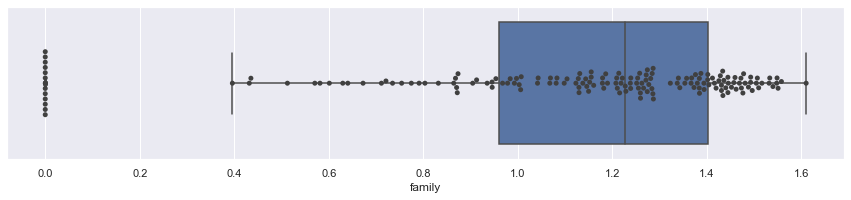

In [6]:
dataset = pd.read_csv('./datasets/felicidad_corrupt.csv')
    
X = dataset.drop(['country', 'score'], axis=1)
y = dataset[['score']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(dataset.tail(2)) # mustra los datos outliers añadidos 

# mostramos graficamente los outliers presentes en una variables a usar
sns.set(rc={'figure.figsize':(15,2.8)})
ax = sns.boxplot(x="family", data=X)
ax = sns.swarmplot(x="family", data=X, color=".25")
plt.show()


## como trabajar con varios estimadores 
antes cuando trabajambamos con varios estimadores (modelos ) hemos tenido que hacer las fases de: train test y evaluation uno por uno en bloques. 
una forma mas efectiva para usar varios estimadores es guardarlos en una diccionario.


- **SVM (Suppot Vector Machine)**: Con el parámetro C podemos controlar la penalización por error en la clasificación. Si C tiene valores amplios entonces, se penaliza de forma más estricta los errores, mientras que si escogemos un C pequeño seremos menos estrictos con los errores. En otras palabras, si C es pequeño aumenta el sesgo y disminuye la varianza del modelo.
- **RANSAC**: Al ser un meta estimador, podemos pasarle como parámetros diferentes estimadores, para nuestro caso vamos a trabajar de una forma genenérica.
- **HUBER**: El valor de epsilon es 1.35. Utilizamos este valor ya que se ha demostrado que logra un 95% de eficiencia estadística.

In [8]:
estimadores = {
    'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1),
    # es un Meta estimador osae RANSACRegressor(SVR()) se pasa un modelo como param. por default es un linear
    'RANSAC': RANSACRegressor(),  
    'HUBER': HuberRegressor(epsilon=1.35)
}

SVR
MSE:  0.07455771301888524


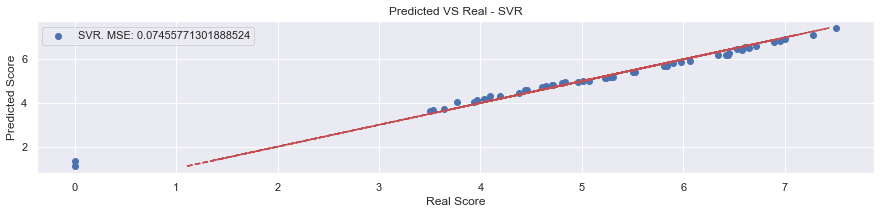

RANSAC
MSE:  1.2756406227833227e-19


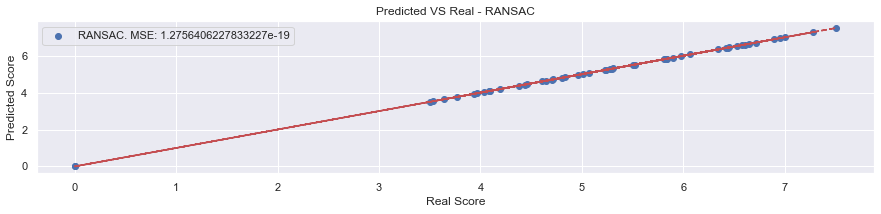

HUBER
MSE:  7.698751816812531e-07


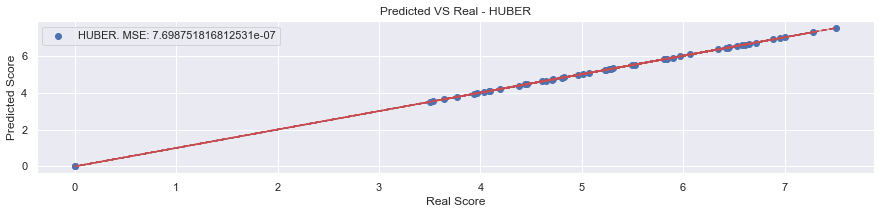

In [9]:
for name, estimador in estimadores.items():
    # Entrenamos
    estimador.fit(X_train, y_train)
    # Predecimos
    predictions = estimador.predict(X_test)
    # evaluamos 
    print('='*64)
    print(name)
    meanSquaredError = mean_squared_error(y_test, predictions)
    print('MSE: ', meanSquaredError)

    # Graficamos
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title(f'Predicted VS Real - {name}')
    plt.scatter(y_test, predictions, label=f'{name}. MSE: {meanSquaredError}')
    plt.plot(predictions, predictions, 'r--')
    plt.legend()
    plt.show()